In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required libraries
import numpy as np  # For handling arrays (image data)
import pandas as pd  # For handling tabular data (if needed)
import os  # To interact with system files
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # For visualizing images and results

# TensorFlow and Keras for Deep Learning
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras.models import Sequential  # For building the CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from sklearn.model_selection import train_test_split  # To split data into training and validation sets
from tensorflow.keras.utils import to_categorical  # To convert labels into a one-hot encoding format

In [3]:
# Load the datasets
file_16_features = "C:\\Users\\HP\\OneDrive\\Desktop\\Github projects\\Intern Xcelerate\\Pistachio_Image_Dataset\\Pistachio_16_Features_Dataset\\Pistachio_16_Features_Dataset.xlsx"
file_28_features = "C:\\Users\\HP\\OneDrive\\Desktop\\Github projects\\Intern Xcelerate\\Pistachio_Image_Dataset\\Pistachio_28_Features_Dataset\\Pistachio_28_Features_Dataset.xlsx"

# Read the Excel files
df_16 = pd.read_excel(file_16_features)
df_28 = pd.read_excel(file_28_features)

# Display basic information about the datasets
df_16_info = df_16.info()
df_28_info = df_28.info()

# Check the first few rows of each dataset
df_16_head = df_16.head()
df_28_head = df_28.head()

# Check for missing values
df_16_missing = df_16.isnull().sum()
df_28_missing = df_28.isnull().sum()

# Check class distribution
df_16_class_distribution = df_16['Class'].value_counts()
df_28_class_distribution = df_28['Class'].value_counts()

(df_16_info, df_16_head, df_16_missing, df_16_class_distribution,
 df_28_info, df_28_head, df_28_missing, df_28_class_distribution)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

(None,
     AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
 0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
 1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
 2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
 3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
 4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   
 
    CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
 0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
 1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
 2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
 3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
 4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   
 
    SHAPEFACTOR_2

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Select dataset (using 28-feature dataset for now)
df = df_28.copy()

# Encode the class labels (Kirmizi_Pistachio -> 0, Siirt_Pistachio -> 1)
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])  # 0 or 1

# Separate features and labels
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Labels

# Normalize feature values between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the final shape of training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1718, 28), (430, 28), (1718,), (430,))

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    
    Dense(16, activation='relu'),  # Third hidden layer
    
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5935 - loss: 0.6563 - val_accuracy: 0.8674 - val_loss: 0.4947
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7705 - loss: 0.5074 - val_accuracy: 0.8674 - val_loss: 0.3568
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.3673 - val_accuracy: 0.8674 - val_loss: 0.3197
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8728 - loss: 0.3222 - val_accuracy: 0.8721 - val_loss: 0.3031
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8549 - loss: 0.3355 - val_accuracy: 0.8744 - val_loss: 0.3015
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8546 - loss: 0.3192 - val_accuracy: 0.8605 - val_loss: 0.3314
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8853 - loss: 0.2780 - val_accuracy: 0.8674 - val_loss: 0.3183
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8817 - loss: 0.2764 - val_accuracy: 0.8791 - val_loss

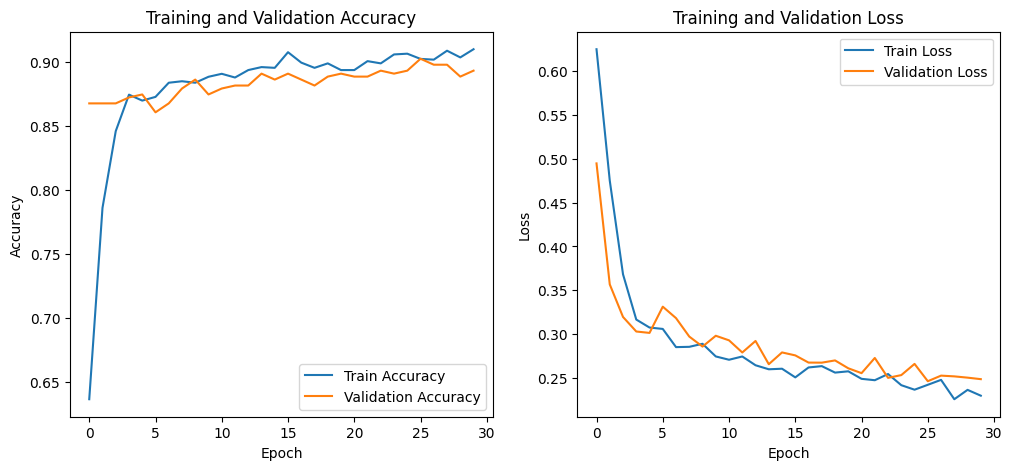

In [6]:
# Train the model on the training data
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=30,       # You can adjust the number of epochs
                    batch_size=32,   # Batch size (adjust as needed)
                    verbose=1)

# Optionally, plot training/validation accuracy and loss over epochs:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set the path to your dataset
dataset_path = r'C:\Users\HP\OneDrive\Desktop\Github projects\Intern Xcelerate\Pistachio_Image_Dataset\Pistachio_Image_Dataset'

# Image size (must match the input size of your CNN)
image_size = (32, 32)  # You can adjust this based on your model's input shape
batch_size = 32

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(rescale=1.0/255.0,  # Normalize the pixel values
                             validation_split=0.2)  # 80% training, 20% validation

# Load and preprocess training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training',  # Specify this is for training data
    shuffle=True
)

# Load and preprocess validation data
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='validation',  # Specify this is for validation data
    shuffle=False  # Validation data should not be shuffled
)

# Print class labels (this helps verify if the classes are correctly assigned)
print(f"Class labels: {train_data.class_indices}")


Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Class labels: {'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(2, activation='softmax')  # 2 output classes (Kirmizi vs Siirt)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,690 (1.20 MB)

 Trainable params: 314,690 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model using the data generators
history = model.fit(
    train_data,
    epochs=20,  # You can change the number of epochs
    validation_data=validation_data
)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 632ms/step - accuracy: 0.6957 - loss: 0.5772 - val_accuracy: 0.7855 - val_loss: 0.4507
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8121 - loss: 0.4284 - val_accuracy: 0.7925 - val_loss: 0.4556
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.8146 - loss: 0.4191 - val_accuracy: 0.7949 - val_loss: 0.4102
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8332 - loss: 0.3825 - val_accuracy: 0.7995 - val_loss: 0.4233
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8490 - loss: 0.3513 - val_accuracy: 0.8368 - val_loss: 0.3585
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8558 - loss: 0.3346 - val_accuracy: 0.8555 - val_loss: 0.3324
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8806 - loss: 0.2907 - val_accuracy: 0.8485 - val_loss: 0.3175
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.8803 - loss: 0.2779 - val_accuracy: 0

In [10]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9470 - loss: 0.1785
Validation Accuracy: 0.9371


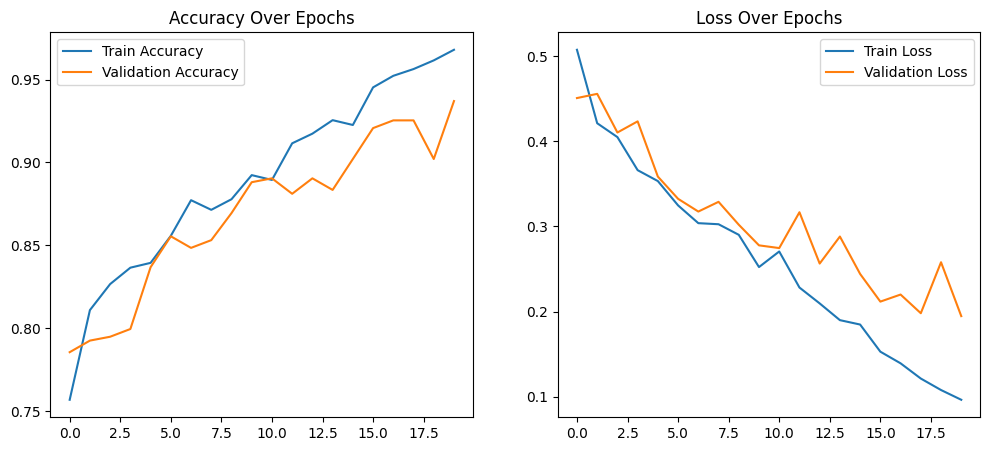

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [12]:
# Save the trained model
model.save('pistachio_cnn_model.h5')

# If you want to load it later:
from tensorflow.keras.models import load_model
model = load_model('pistachio_cnn_model.h5')


In [13]:

# Load the test data generator (similar to validation data)
# Set the correct path to your dataset
dataset_path = r'C:\Users\HP\OneDrive\Desktop\Github projects\Intern Xcelerate\Pistachio_Image_Dataset\Pistachio_Image_Dataset'
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the trained model
model = load_model('pistachio_cnn_model.h5')
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so we can compare true labels
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Get true labels
true_classes = test_generator.classes  # Actual labels from directory structure
class_labels = list(test_generator.class_indices.keys())  # Get class names

# Print accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 2148 images belonging to 2 classes.
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step
Test Accuracy: 97.67%


In [14]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.99      0.97      0.98      1232
  Siirt_Pistachio       0.96      0.98      0.97       916

         accuracy                           0.98      2148
        macro avg       0.98      0.98      0.98      2148
     weighted avg       0.98      0.98      0.98      2148



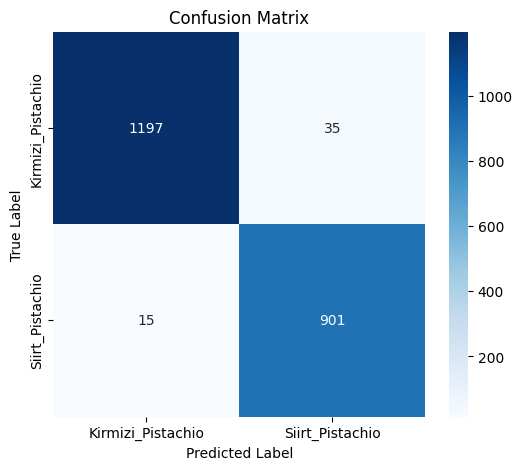

In [15]:
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


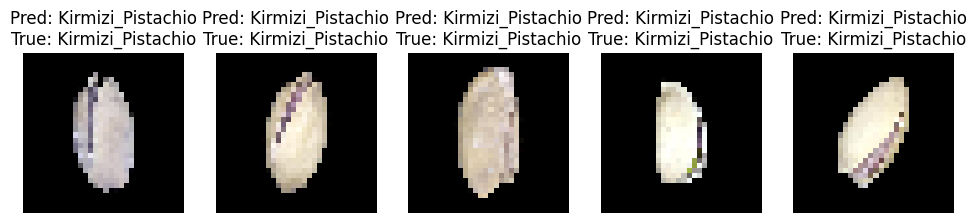

In [16]:
# Get some test images and their predicted classes
test_images, test_labels = next(test_generator)  # Get a batch of images and labels
predicted_classes = np.argmax(model.predict(test_images), axis=1)  # Predict for the batch

# Get the true class labels from the generator
true_classes = test_labels.argmax(axis=1)  # Convert one-hot encoding to class indices

# Plot the first 5 images in the batch with their predictions
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])  # Display the image
    plt.title(f"Pred: {class_labels[predicted_classes[i]]}\nTrue: {class_labels[true_classes[i]]}")
    plt.axis('off')  # Hide axes for better visualization
plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


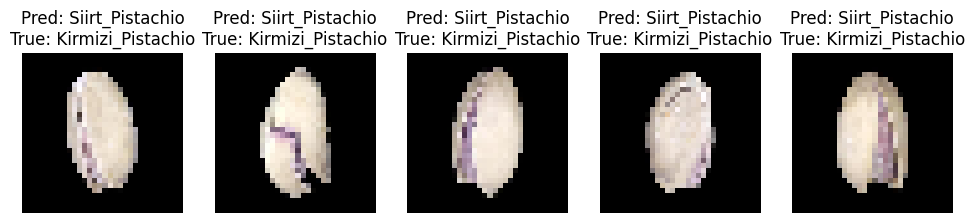

In [17]:
# Get all images and labels from the test generator
test_images = []
test_labels = []
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    test_images.append(images)
    test_labels.append(labels)

# Convert to numpy arrays
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict on all test images
predicted_classes = np.argmax(model.predict(test_images), axis=1)
true_classes = np.argmax(test_labels, axis=1)  # Convert one-hot to class indices

# Find misclassified images
misclassified_idx = np.where(predicted_classes != true_classes)[0]

# Plot a few misclassified images
plt.figure(figsize=(12, 5))
for i, idx in enumerate(misclassified_idx[:5]):  # Display first 5 misclassified
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Pred: {class_labels[predicted_classes[idx]]}\nTrue: {class_labels[true_classes[idx]]}")
    plt.axis('off')
plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  # Import this for loading your model
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing subfolders with images
new_images_folder = 'C:\\Users\\HP\\OneDrive\\Desktop\\Github projects\\Intern Xcelerate\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset'  # Replace with the folder path

# Load the model
model = load_model('pistachio_cnn_model.h5')  # Path to your trained model

# List all subfolders in the folder
subfolders = [f for f in os.listdir(new_images_folder) if os.path.isdir(os.path.join(new_images_folder, f))]
print(f"Subfolders: {subfolders}")  # Debugging print statement

# Define class labels for prediction
class_labels = {0: 'Kirmizi_Pistachio', 1: 'Siirt_Pistachio'}

# Collect all images
all_images = []
for subfolder in subfolders:
    subfolder_path = os.path.join(new_images_folder, subfolder)
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    all_images.extend([os.path.join(subfolder_path, f) for f in image_files])

print(f"Total number of images: {len(all_images)}")  # Debugging: total images found

# If no images are found, stop execution
if len(all_images) == 0:
    print("No images found in the directory!")
    exit()

# Calculate number of rows and columns for the plot
images_per_row = 6  # Number of images per row
num_images = len(all_images)
num_rows = (num_images // images_per_row) + (1 if num_images % images_per_row != 0 else 0)  # Calculate the number of rows required

# Create a figure with enough space for all the images
fig, axes = plt.subplots(nrows=num_rows, ncols=images_per_row, figsize=(images_per_row * 3, num_rows * 3)) 
axes = axes.flatten()

# Loop through all images and display them
for img_idx, img_path in enumerate(all_images):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to match the model input
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the class index (0 or 1)
    predicted_label = class_labels[predicted_class]

    # Display the image in the subplot
    axes[img_idx].imshow(img)
    axes[img_idx].set_title(f"Pred: {predicted_label}")
    axes[img_idx].axis('off')

# Remove extra axes if there are fewer images than available slots
for i in range(img_idx + 1, len(axes)):
    axes[i].axis('off')

# Show the images
plt.tight_layout()
plt.show()

Subfolders: ['Kirmizi_Pistachio', 'Siirt_Pistachio']
Total number of images: 2148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


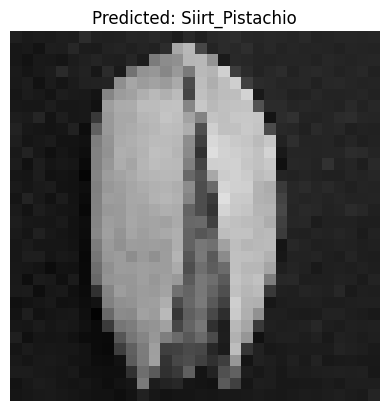

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


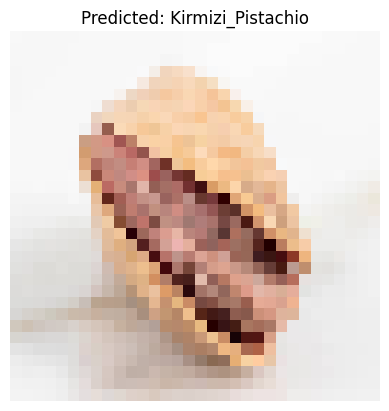

In [26]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the folder where new images are located
new_images_folder = r'C:\\Users\\HP\\OneDrive\\Desktop\\Github projects\\Intern Xcelerate\\Pistachio_Image_Dataset\\Examples'  # Update this path with your images folder

# Define class labels for prediction
class_labels = {0: 'Kirmizi_Pistachio', 1: 'Siirt_Pistachio'}

# List all images in the folder
new_images = [f for f in os.listdir(new_images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image and make a prediction
for img_name in new_images:
    img_path = os.path.join(new_images_folder, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(32, 32))  # Resize image to model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the class index (0 or 1)
    predicted_label = class_labels[predicted_class]

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
